In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly as px

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [ ]:
df = pd.read_csv("./adult/adult.data")

In [5]:
df.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","class"]

# Import Data

In [67]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [74]:
df[df["class"] == " >50K"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
10,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32544,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [64]:
df["capital-gain"].max()

np.int64(99999)

# Exploratory Data Analysis (EDA)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  class           32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## observing

In [8]:
# for i in df.columns:
#     if df[i].dtype=="object":
#         print(df[i].value_counts())
#         print("THE COLUMNS",df[i])
#         print("\n")

In [9]:
df["native-country"].value_counts()

native-country
United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [10]:
df["native-country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [11]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [12]:
df["education"].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [13]:
df["marital-status"].value_counts()

marital-status
Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [14]:
df["relationship"].value_counts()

relationship
Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [15]:
df["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [16]:
df["sex"].value_counts()

sex
Male      21789
Female    10771
Name: count, dtype: int64

In [17]:
df["race"].value_counts()

race
White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [18]:
df["class"].value_counts(normalize=True).round(2)

class
<=50K    0.76
>50K     0.24
Name: proportion, dtype: float64

In [19]:
occu_sex = df.groupby(["sex","occupation"])["education-num"].count().unstack()

<Axes: ylabel='sex'>

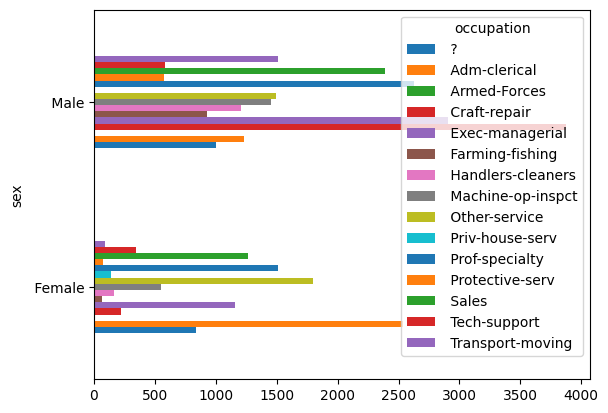

In [20]:
# sns.barplot(occu_sex)
occu_sex.plot(kind="barh")

In [21]:
occu_sex

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
sex,,,,,,,,,,,,,,,
Female,841.0,2537.0,NaN,222.0,1159.0,65.0,164.0,550.0,1800.0,141.0,1515.0,76.0,1263.0,348.0,90.0
Male,1002.0,1232.0,9.0,3877.0,2907.0,929.0,1206.0,1452.0,1495.0,8.0,2625.0,573.0,2387.0,580.0,1507.0


In [22]:
sex_education_num = df.groupby("sex")["education-num"].value_counts().unstack()
sex_education_num

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
sex,,,,,,,,,,,,,,,,
Female,16,46,84,160,144,295,432,144,3390,2806,500,421,1619,536,92,86
Male,35,122,249,486,370,638,743,289,7111,4485,882,646,3735,1187,484,327


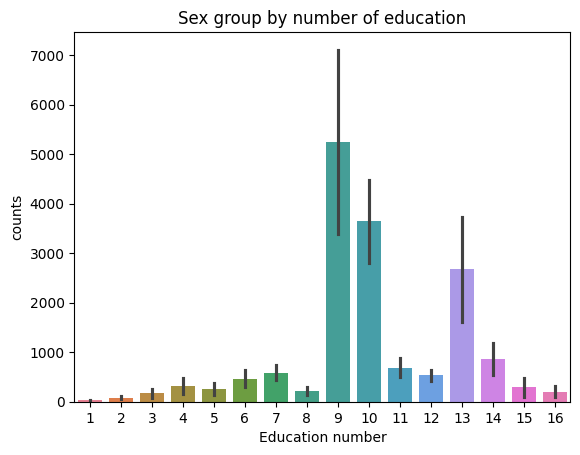

In [23]:
sns.barplot(data=sex_education_num)

plt.title("Sex group by number of education")
plt.xlabel("Education number")
plt.ylabel("counts")
plt.show()

<Axes: ylabel='fnlwgt'>

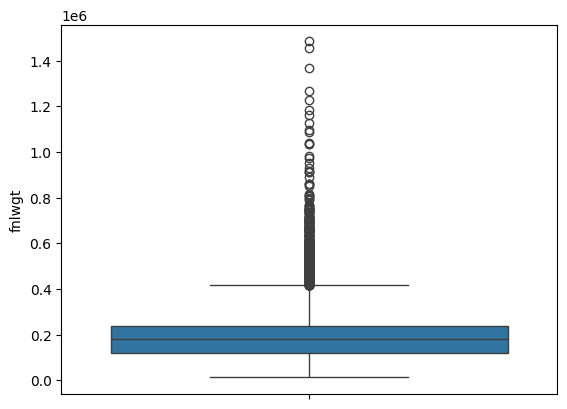

In [24]:
sns.boxplot(df["fnlwgt"])

# Data Cleaning

In [25]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [26]:
df_drop = df.drop(["fnlwgt","education","native-country","marital-status"], axis=1)

In [27]:
df_drop.head()

,age,workclass,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class
0,50,Self-emp-not-inc,13,Exec-managerial,Husband,White,Male,0,0,13,<=50K
1,38,Private,9,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
2,53,Private,7,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
3,28,Private,13,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
4,37,Private,14,Exec-managerial,Wife,White,Female,0,0,40,<=50K


In [28]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   education-num   32560 non-null  int64 
 3   occupation      32560 non-null  object
 4   relationship    32560 non-null  object
 5   race            32560 non-null  object
 6   sex             32560 non-null  object
 7   capital-gain    32560 non-null  int64 
 8   capital-loss    32560 non-null  int64 
 9   hours-per-week  32560 non-null  int64 
 10  class           32560 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.7+ MB


In [29]:
# df = pd.DataFrame({'color': ['red', 'green', 'blue', 'green']})
# dummies = pd.get_dummies(df, columns=['color'], prefix='color', dtype=int)
# print(dummies)

In [30]:
df_drop['workclass'] = df_drop['workclass'].astype('category').cat.codes
df_drop['occupation'] = df_drop['occupation'].astype('category').cat.codes
df_drop['relationship'] = df_drop['relationship'].astype('category').cat.codes
df_drop['race'] = df_drop['race'].astype('category').cat.codes
df_drop['sex'] = df_drop['sex'].astype('category').cat.codes
df_drop['class'] = df_drop['class'].astype('category').cat.codes

In [31]:
df_drop.head()

,age,workclass,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class
0,50,6,13,4,0,4,1,0,0,13,0
1,38,4,9,6,1,4,1,0,0,40,0
2,53,4,7,6,0,2,1,0,0,40,0
3,28,4,13,10,5,2,0,0,0,40,0
4,37,4,14,4,5,4,0,0,0,40,0


In [32]:
X = df_drop.drop(["class"], axis=1)
y = df_drop["class"]

In [33]:
from sklearn.model_selection import train_test_split



In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.head()
len(X_train)

26048

In [36]:
X_test.head()
len(X_test)

6512

In [37]:
y_train.head()
len(y_train)

26048

In [38]:
y_test.head()
len(y_test)

6512

In [39]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

c:\Users\Administrator\Desktop\MLclass\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [40]:
from sklearn.metrics import accuracy_score

# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8018


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris # Example dataset
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[4500  412]
 [ 582 1018]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4912
           1       0.71      0.64      0.67      1600

    accuracy                           0.85      6512
   macro avg       0.80      0.78      0.79      6512
weighted avg       0.84      0.85      0.84      6512



In [43]:
# Make predictions and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8474


In [44]:
import xgboost as xgb

In [45]:
xgb_class = xgb.XGBClassifier(objective='binary:logistic',  # For binary classification
                        n_estimators=100,
                        learning_rate=0.1,
                        max_depth=3,
                        use_label_encoder=False, # Suppress warning, set to True if needed for older versions
                        eval_metric='logloss') # Evaluation metric for classification

# Fit the model
xgb_class.fit(X_train, y_train)

# Make predictions
y_pred = xgb_class.predict(X_test)

# Evaluate the model (e.g., using accuracy score)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8659398034398035


c:\Users\Administrator\Desktop\MLclass\ml\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:09:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
